In [1]:
!pip install pgmpy networkx matplotlib
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.1 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
from pgmpy.inference import BeliefPropagation
from pgmpy. factors.discrete import TabularCPD

In [3]:
model = BayesianModel([('Weather','Traffic'), ('Traffic','Late')])

In [4]:
# Weather CPD
cpd_weather = TabularCPD(variable='Weather', variable_card=2, values=[[0.8], [0.2]]) # Probabilities should sum to 1, e.g., 0.8 and 0.2

# Traffic CPD given Weather
cpd_traffic = TabularCPD(variable='Traffic', variable_card=2,
                        values=[[0.9, 0.5], [0.1, 0.5]],  # P(Light | Sunny, Rainy)
                        evidence=['Weather'],
                        evidence_card=[2])

# Late CPD given Traffic
cpd_late = TabularCPD(variable='Late', variable_card=2,
                      values=[[0.95, 0.4], [0.05, 0.6]],  # P(On Time | Light, Heavy) , probabilities should sum to 1 for each state of evidence
                      evidence=['Traffic'],
                      evidence_card=[2])

# Add CPDs to the model
model.add_cpds(cpd_weather, cpd_traffic, cpd_late)

# Check if the model is valid
assert model.check_model()

In [5]:
# Create an inference object
inference = VariableElimination (model)
# Query the probability of being Late given that Weather is Rainy
result = inference.query(variables=['Late'], evidence={'Weather': 1}) # 1 corresponds
print(result)

+---------+-------------+
| Late    |   phi(Late) |
+=========+=============+
| Late(0) |      0.6750 |
+---------+-------------+
| Late(1) |      0.3250 |
+---------+-------------+


In [6]:
data = pd.DataFrame({
    'Weather': np.random.choice([0, 1], size=1000, p=[0.8, 0.2]),
    'Traffic': np.nan,
    'Late': np.nan
})

data.loc[data['Weather'] == 0, 'Traffic'] = np.random.choice(
    [0, 1],
    size=data[data['Weather'] == 0].shape[0],
    p=[0.9, 0.1]
)

data.loc[data['Weather'] == 1, 'Traffic'] = np.random.choice(
    [0, 1],
    size=data[data['Weather'] == 1].shape[0],
    p=[0.5, 0.5]
)

data['Late'] = np.where(
    data['Traffic'] == 0,
    np.random.choice([0, 1], size=data.shape[0], p=[0.95, 0.05]),
    np.random.choice([0, 1], size=data.shape[0], p=[0.4, 0.6])
)

In [7]:
from pgmpy.estimators import MaximumLikelihoodEstimator

model = BayesianModel([('Weather', 'Traffic'), ('Traffic', 'Late')])

model.fit(data, estimator=MaximumLikelihoodEstimator)

for cpd in model.get_cpds():
  print(cpd)

+------------+-------+
| Weather(0) | 0.785 |
+------------+-------+
| Weather(1) | 0.215 |
+------------+-------+
+--------------+---------------------+--------------------+
| Weather      | Weather(0)          | Weather(1)         |
+--------------+---------------------+--------------------+
| Traffic(0.0) | 0.8968152866242038  | 0.5069767441860465 |
+--------------+---------------------+--------------------+
| Traffic(1.0) | 0.10318471337579618 | 0.4930232558139535 |
+--------------+---------------------+--------------------+
+---------+----------------------+---------------------+
| Traffic | Traffic(0.0)         | Traffic(1.0)        |
+---------+----------------------+---------------------+
| Late(0) | 0.9532595325953259   | 0.47593582887700536 |
+---------+----------------------+---------------------+
| Late(1) | 0.046740467404674045 | 0.5240641711229946  |
+---------+----------------------+---------------------+


In [8]:
data = pd.DataFrame({
    'Weather': np.random.choice([0, 1], size=1000, p=[0.8, 0.2]),
    'Traffic': np.nan,
    'Late': np.nan
})

# Changed the size parameter to reference rows where 'Weather' == 0
data.loc[data['Weather'] == 0, 'Traffic'] = np.random.choice(
    [0, 1],
    size=data[data['Weather'] == 0].shape[0], # Corrected size
    p=[0.9, 0.1]
)

data.loc[data['Weather'] == 1, 'Traffic'] = np.random.choice(
    [0, 1],
    size=data[data['Weather'] == 1].shape[0],
    p=[0.5, 0.5]
)

data['Late'] = np.where(
    data['Traffic'] == 0,
    np.random.choice([0, 1], size=data.shape[0], p=[0.95, 0.05]),
    np.random.choice([0, 1], size=data.shape[0], p=[0.4, 0.6])
)

In [9]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
from pgmpy.estimators import MaximumLikelihoodEstimator


# Generate consistent sample data
data = pd.DataFrame({
    'Weather': np.random.choice([0, 1], size=1000, p=[0.8, 0.2]),
    'Traffic': np.nan,
    'Late': np.nan
})

# Assign Traffic values based on Weather
data.loc[data['Weather'] == 0, 'Traffic'] = np.random.choice(
    [0, 1],
    size=data[data['Weather'] == 0].shape[0],  # Use the correct slice size
    p=[0.9, 0.1]
)

data.loc[data['Weather'] == 1, 'Traffic'] = np.random.choice(
    [0, 1],
    size=data[data['Weather'] == 1].shape[0],  # Use the correct slice size
    p=[0.5, 0.5]
)

# Assign Late values based on Traffic
data['Late'] = np.where(
    data['Traffic'] == 0,
    np.random.choice([0, 1], size=data.shape[0], p=[0.95, 0.05]),
    np.random.choice([0, 1], size=data.shape[0], p=[0.4, 0.6])
)

# Create Bayesian Model
model = BayesianModel([('Weather', 'Traffic'), ('Traffic', 'Late')])

# Fit the model to the data
model.fit(data, estimator=MaximumLikelihoodEstimator)

# Print the CPDs
for cpd in model.get_cpds():
    print(cpd)

+------------+-------+
| Weather(0) | 0.814 |
+------------+-------+
| Weather(1) | 0.186 |
+------------+-------+
+--------------+---------------------+---------------------+
| Weather      | Weather(0)          | Weather(1)          |
+--------------+---------------------+---------------------+
| Traffic(0.0) | 0.9250614250614251  | 0.5645161290322581  |
+--------------+---------------------+---------------------+
| Traffic(1.0) | 0.07493857493857493 | 0.43548387096774194 |
+--------------+---------------------+---------------------+
+---------+----------------------+--------------------+
| Traffic | Traffic(0.0)         | Traffic(1.0)       |
+---------+----------------------+--------------------+
| Late(0) | 0.9452214452214452   | 0.4859154929577465 |
+---------+----------------------+--------------------+
| Late(1) | 0.054778554778554776 | 0.5140845070422535 |
+---------+----------------------+--------------------+


Nodes: ['Weather', 'Traffic', 'Late']
Edges: [('Weather', 'Traffic'), ('Traffic', 'Weather'), ('Traffic', 'Late'), ('Late', 'Traffic')]


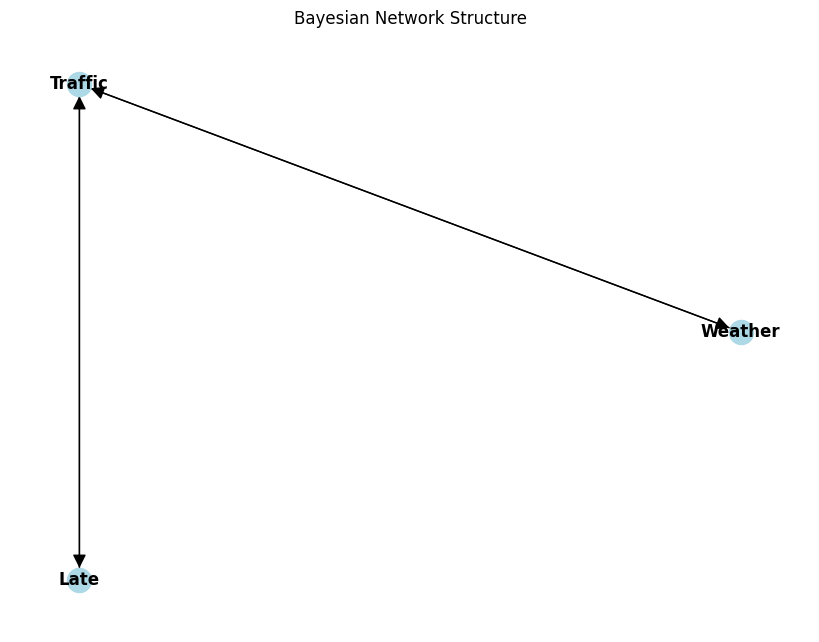

In [15]:
import matplotlib.pyplot as plt
import networkx as nx
from pgmpy.models import BayesianModel

# Assuming 'model' is your BayesianModel object
plt.ion()  # Enable interactive mode

# Get the underlying NetworkX graph
# Convert to Markov model and ensure it's a directed graph
try:
    nx_agraph = nx.DiGraph(model.to_markov_model())

    # Debugging: Print nodes and edges right after conversion
    print("Nodes:", nx_agraph.nodes())
    print("Edges:", nx_agraph.edges())

except Exception as e:
    print(f"Error converting model to Markov model: {e}")

# Check if the graph has nodes and edges
if len(nx_agraph.nodes()) == 0:
    print("Error: The graph has no nodes.")
elif nx_agraph.number_of_edges() == 0:
    print("Error: The graph has no edges.")
else:
    # Create a new figure for the plot
    plt.figure(figsize=(8, 6))

    # Generate positions for the nodes using circular layout
    pos = nx.circular_layout(nx_agraph)  # Change to circular layout here

    # Draw the directed graph with specified parameters
    nx.draw(
        nx_agraph, pos,
        with_labels=True,
        node_color='lightblue',
        font_weight='bold',
        arrows=True,
        arrowstyle='-|>',
        arrowsize=20
    )

    # Set the title of the plot
    plt.title('Bayesian Network Structure')

    # Show the plot
    plt.show()